In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# os.chdir(os.path.dirname(__file__))
# %

In [28]:
pos_avg=open("data_sam/r1_nl_aec.txt","r")#r
pos_avg2=open("data_sam/r1_nl_aec.txt","r")#g

pos=open("data_sam/r1_nl_dec.txt","r")#b

#id=["0"]
ids=["0","1","2","3","8","9"]


In [29]:

#parse the txt file, we only need id, pose.position.x, pose.position.y, pose.position.z
nsec_set=set()
#location is a list, location[i][j] means the xyz location of the camera in the ith frame and the jth fiducial marker
location = [[] for _ in range(6)]


cnt_frame=0
cnt_xyz=0
flag=False
temp_xyz=[0,0,0]
cnt_samples=0
id_it=0

for id in ids:
    cnt_frame=0
    cnt_xyz=0
    flag=False
    temp_xyz=[0,0,0]
    cnt_samples=0
    pos_avg.seek(0)
    for line in pos_avg:
        #every different nsec means a new frame
        #parse the line with space
        line=line.split()
        if flag and cnt_frame<11:
            cnt_frame+=1
        
        if cnt_frame==11:
            #mark the following 3 lines as x,y,z
            if cnt_xyz==0:
                temp_xyz[0]=float(line[1])
            elif cnt_xyz==1:
                temp_xyz[1]=float(line[1])
            elif cnt_xyz==2:
                temp_xyz[2]=float(line[1])
                #location[cnt_frame-1][int(line[1])]=temp_xyz
                cnt_xyz=0
                cnt_frame=0
                flag=False
                #append the xyz to the location list
                location[id_it].append(temp_xyz)####
                cnt_samples+=1
                #print(temp_xyz)
                temp_xyz=[0,0,0]
                continue
            cnt_xyz+=1
    
        #everytime encounter a "id:", jump to the next 11th line
        if line[0]=="id:":
            if line[1]==id:
                flag=True
                #print(cnt_frame)
                #print(line[2])
    id_it+=1
#print(location)

print(cnt_samples)
aec_samples=cnt_samples

980


In [30]:

location1=[[] for _ in range(6)]
cnt_frame=0
cnt_xyz=0
flag=False
temp_xyz=[0,0,0]
cnt_samples=0
id_it=0

for id in ids:
    cnt_frame=0
    cnt_xyz=0
    flag=False
    temp_xyz=[0,0,0]
    cnt_samples=0
    pos_avg2.seek(0)
    for line in pos_avg2:
        #every different nsec means a new frame
        #parse the line with space
        line=line.split()
        if flag and cnt_frame<11:
            cnt_frame+=1
        
        if cnt_frame==11:
            #mark the following 3 lines as x,y,z
            if cnt_xyz==0:
                temp_xyz[0]=float(line[1])
            elif cnt_xyz==1:
                temp_xyz[1]=float(line[1])
            elif cnt_xyz==2:
                temp_xyz[2]=float(line[1])
                #location[cnt_frame-1][int(line[1])]=temp_xyz
                cnt_xyz=0
                cnt_frame=0
                flag=False
                #append the xyz to the location list
                location1[id_it].append(temp_xyz)
                cnt_samples+=1
                #print(temp_xyz)
                temp_xyz=[0,0,0]
                continue
            cnt_xyz+=1
    
        #everytime encounter a "id:", jump to the next 11th line
        if line[0]=="id:":
            if line[1]==id:
                flag=True
                #print(cnt_frame)
                #print(line[2])
    id_it+=1
#print(location)

print(cnt_samples)



980


In [41]:

#now do the same thing for pos.txt
location2=[[] for _ in range(6)]
cnt_frame=0
cnt_xyz=0
flag=False
temp_xyz=[0,0,0]
cnt_samples=0
id_it=0


for id in ids:
    cnt_frame=0
    cnt_xyz=0
    flag=False
    temp_xyz=[0,0,0]
    cnt_samples=0
    pos.seek(0)
    for line in pos:
        #every different nsec means a new frame
        #parse the line with space
        line=line.split()
        if flag and cnt_frame<11:
            cnt_frame+=1
        
        if cnt_frame==11:
            #mark the following 3 lines as x,y,z
            if cnt_xyz==0:
                temp_xyz[0]=float(line[1])
            elif cnt_xyz==1:
                temp_xyz[1]=float(line[1])
            elif cnt_xyz==2:
                temp_xyz[2]=float(line[1])
                #location[cnt_frame-1][int(line[1])]=temp_xyz
                cnt_xyz=0
                cnt_frame=0
                flag=False
                #append the xyz to the location list
                location2[id_it].append(temp_xyz)
                cnt_samples+=1
                if(cnt_samples==aec_samples):
                    break
                elif(cnt_samples>aec_samples):
                    print("error")
                    break
                
                temp_xyz=[0,0,0]
                continue
            cnt_xyz+=1
    
        #everytime encounter a "id:", jump to the next 11th line
        if line[0]=="id:":
            if line[1]==id:
                flag=True
                #print(cnt_frame)
                #print(line[2])

    id_it+=1
        
#print(location2)
print(cnt_samples)


446


In [42]:
print(len(location[0]))
print(len(location1[0]))
print(len(location2))

980
980
6


In [46]:

#now calculate the variance of the location and location2


for i in range(6):
    var_location=np.var(location[i],axis=0)
    var_location1=np.var(location1[i],axis=0)
    var_location2=np.var(location2[i],axis=0)
    
    #get the standard deviation
    sqrt_var_location=np.sqrt(var_location)
    sqrt_var_location1=np.sqrt(var_location1)
    sqrt_var_location2=np.sqrt(var_location2)
    
    print("sqrt_var_location: ",sqrt_var_location)
    print("sqrt_var_location1: ",sqrt_var_location1)
    print("sqrt_var_location2: ",sqrt_var_location2)
    
    #get the covariance matrix
    cov_location=np.cov(location[i],rowvar=False)
    cov_location1=np.cov(location1[i],rowvar=False)
    cov_location2=np.cov(location2[i],rowvar=False)

    print("id=", ids[i])
    print("cov_location (for aec): ",cov_location)
    #print("cov_location1: ",cov_location1)
    print("cov_location2 (for default): ",cov_location2)


sqrt_var_location:  [6.22760804e-04 1.53250506e-04 5.47122760e-05]
sqrt_var_location1:  [6.22760804e-04 1.53250506e-04 5.47122760e-05]
sqrt_var_location2:  [7.24983860e-04 1.81133430e-04 4.21517952e-05]
id= 0
cov_location (for aec):  [[ 3.88227169e-07 -9.36062203e-08  2.06600981e-08]
 [-9.36062203e-08  2.35097072e-08 -4.42973122e-09]
 [ 2.06600981e-08 -4.42973122e-09  2.99649079e-09]]
cov_location2 (for default):  [[ 5.26782724e-07 -1.29843696e-07  2.37578481e-08]
 [-1.29843696e-07  3.28830482e-08 -5.93086764e-09]
 [ 2.37578481e-08 -5.93086764e-09  1.78076659e-09]]
sqrt_var_location:  [6.79475385e-04 1.72311457e-04 9.88589211e-05]
sqrt_var_location1:  [6.79475385e-04 1.72311457e-04 9.88589211e-05]
sqrt_var_location2:  [0.00078142 0.00019636 0.0001025 ]
id= 1
cov_location (for aec):  [[ 4.62158390e-07 -1.15266661e-07  5.82895711e-08]
 [-1.15266661e-07  2.97215662e-08 -1.45104965e-08]
 [ 5.82895711e-08 -1.45104965e-08  9.78306899e-09]]
cov_location2 (for default):  [[ 6.11994784e-07 -1.5

id=  0


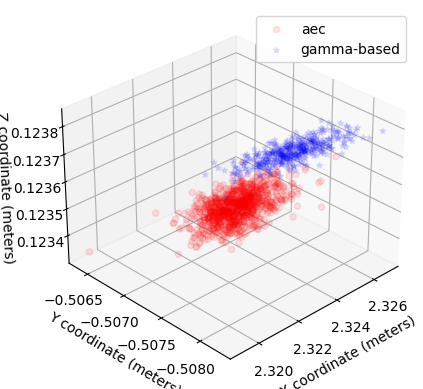

id=  1


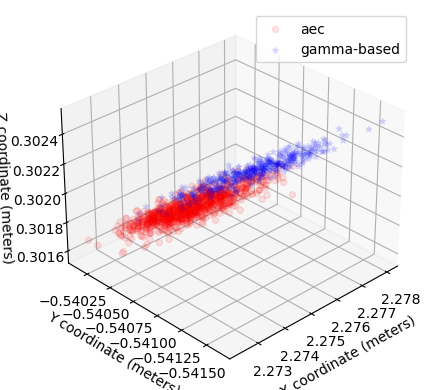

id=  2


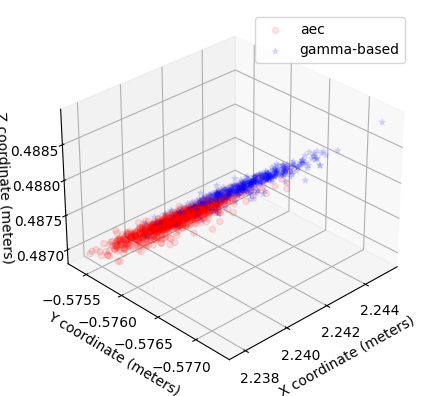

id=  3


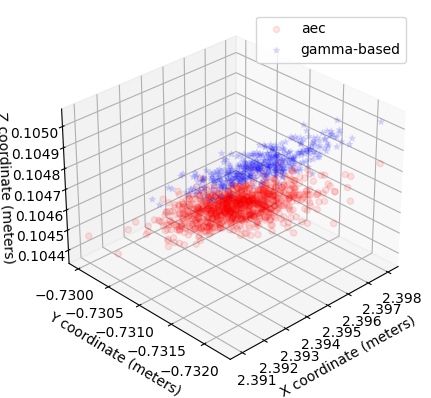

id=  8


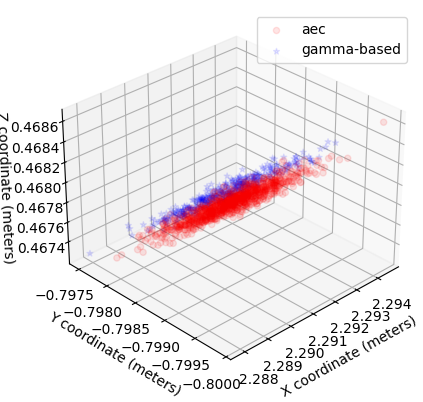

id=  9


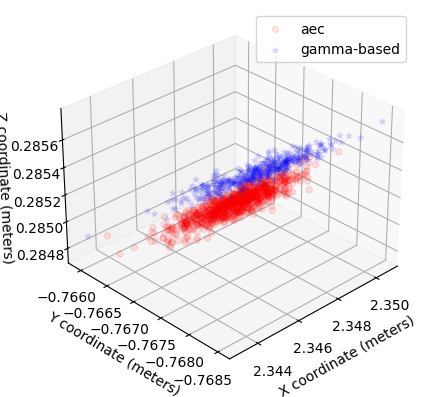

In [47]:


for i in range(6):
    
    #plot location and location2 in 3d plot
    #elevation=30, azimuth=-134
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    
    # ax.scatter([i[0] for i in location],[i[1] for i in location],[i[2] for i in location],c='r',marker='o')
    # ax.scatter([i[0] for i in location1],[i[1] for i in location1],[i[2] for i in location1],c='g',marker='*')
    # ax.scatter([i[0] for i in location2],[i[1] for i in location2],[i[2] for i in location2],c='b',marker='*')
    
    #make the dot transparent
    ax.scatter([i[0] for i in location[i]],[i[1] for i in location[i]],[i[2] for i in location[i]],c='r',marker='o',alpha=0.1)
    #ax.scatter([i[0] for i in location1[i]],[i[1] for i in location1[i]],[i[2] for i in location1[i]],c='g',marker='*',alpha=0.1)
    ax.scatter([i[0] for i in location2[i]],[i[1] for i in location2[i]],[i[2] for i in location2[i]],c='b',marker='*',alpha=0.1)
    
    ax.set_xlabel('X coordinate (meters)')
    ax.set_ylabel('Y coordinate (meters)')
    ax.set_zlabel('Z coordinate (meters)')
    #elevation=30, azimuth=-134
    ax.view_init(30,-134,0)
    #red is aec, green is gamma-based, blue is default exposure control
    ax.legend(["aec","gamma-based","default exposure control"])
    print("id= ", ids[i])
    plt.show()

#9904-9893=11